<a href="https://colab.research.google.com/github/binliu0630/FASTAI_V2/blob/master/Lesson_1_what's_your_pet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai2

     |████████████████████████████████| 184kB 9.5MB/s 


In [2]:
!pip install nbdev

     |████████████████████████████████| 51kB 4.1MB/s 


In [0]:
%matplotlib inline

In [0]:
from fastai2.vision.all import *
from nbdev.showdoc import *

In [0]:
set_seed(2)
bs = 64
bs = 16

In [9]:
help(untar_data)

Help on function untar_data in module fastai2.data.external:

untar_data(url, fname=None, dest=None, c_key='data', force_download=False, extract_func=<function file_extract at 0x7fa6225b9b70>)
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [10]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet.tgz'

In [11]:
path = untar_data(URLs.PETS); path

Path('/root/.fastai/data/oxford-iiit-pet')

In [12]:
Path.BASE_PATH = path
path.ls()

(#2) [Path('images'),Path('annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [14]:
fnames = get_image_files(path_img)
fnames

(#7390) [Path('images/Birman_8.jpg'),Path('images/american_pit_bull_terrier_42.jpg'),Path('images/Egyptian_Mau_85.jpg'),Path('images/japanese_chin_195.jpg'),Path('images/german_shorthaired_131.jpg'),Path('images/english_cocker_spaniel_29.jpg'),Path('images/pug_2.jpg'),Path('images/staffordshire_bull_terrier_4.jpg'),Path('images/boxer_185.jpg'),Path('images/great_pyrenees_6.jpg')...]

In [0]:
dls = ImageDataLoaders.from_name_re(
    path, fnames,pat=r'(.+)_\d+.jpg$', item_tfms=Resize(460), bs=bs, 
    batch_tfms=[*aug_transforms(size=224, min_scale=0.75), Normalize.from_stats(*imagenet_stats)])

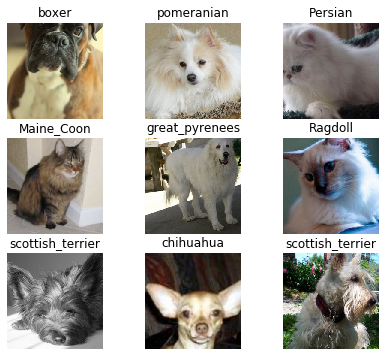

In [33]:
dls.show_batch(max_n=9, figsize=(7,6))

In [17]:
print(dls.vocab)

(#37) ['Abyssinian','Bengal','Birman','Bombay','British_Shorthair','Egyptian_Mau','Maine_Coon','Persian','Ragdoll','Russian_Blue'...]


In [18]:
len(dls.vocab), dls.c

(37, 37)

In [52]:
learn = cnn_learner(dls, resnet34, metrics=error_rate).to_fp16()
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [53]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.995131,0.342481,0.108254,01:16
1,0.578442,0.286979,0.092693,01:16
2,0.475789,0.231516,0.073748,01:17
3,0.355362,0.222875,0.072395,01:16


In [0]:
learn.save('stage-1')

In [55]:
interp = ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(dls.valid_ds) == len(losses) == len(idxs)

True

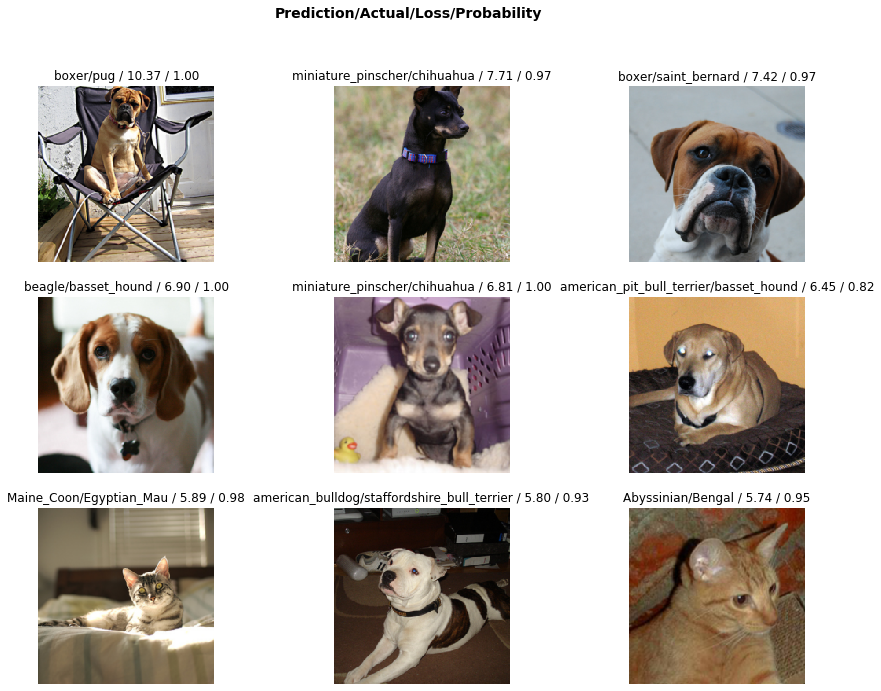

In [38]:
interp.plot_top_losses(9, figsize=(15,11))

In [21]:
doc(interp.plot_top_losses)

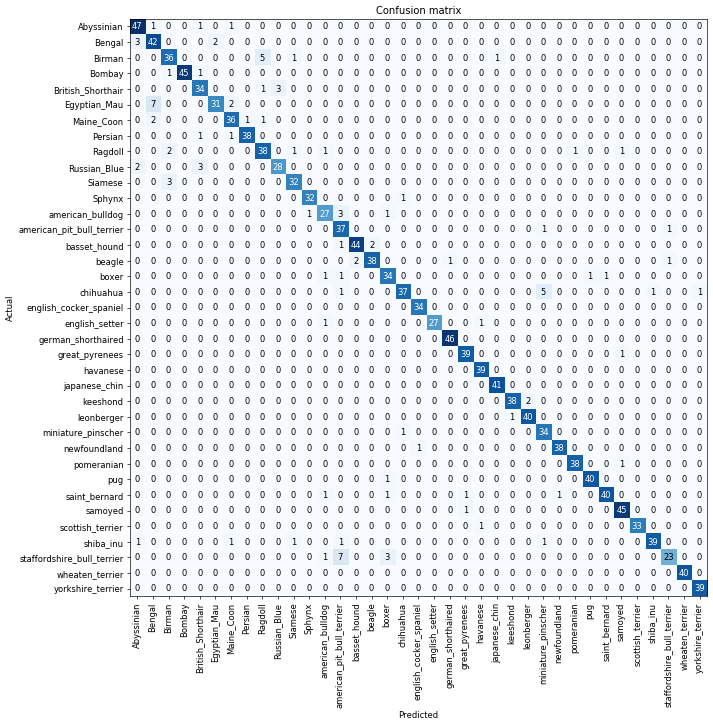

In [39]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [56]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 7),
 ('chihuahua', 'miniature_pinscher', 6),
 ('beagle', 'basset_hound', 5),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('British_Shorthair', 'Russian_Blue', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 4),
 ('Birman', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('Russian_Blue', 'British_Shorthair', 3),
 ('Siamese', 'Birman', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('Bengal', 'Abyssinian', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('basset_hound', 'beagle', 2),
 ('havanese', 'yorkshire_terrier', 2)]

In [0]:
learn.unfreeze()

In [58]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.625361,0.833885,0.274019,01:20


In [0]:
learn.load('stage-1');

(2.5118865210060903e-08, 9.12010818865383e-07)

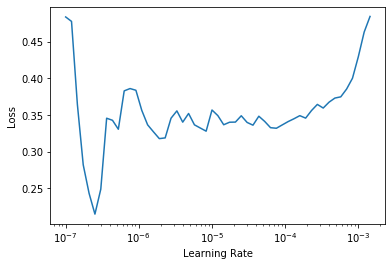

In [60]:
learn.lr_find()

In [61]:
learn.unfreeze()
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.370067,0.218041,0.069012,01:21
1,0.330754,0.211769,0.064953,01:20


In [62]:
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.313443,0.207585,0.063599,01:21
1,0.286210,0.212431,0.070365,01:21


In [63]:
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.286508,0.207697,0.062923,01:19
1,0.276680,0.200122,0.062246,01:20


In [64]:
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.239552,0.212420,0.065629,01:21
1,0.253496,0.205492,0.062246,01:22


In [65]:
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.255892,0.205631,0.060893,01:21
1,0.210621,0.199705,0.062923,01:21


In [66]:
learn.fit_one_cycle(2, lr_max=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.209423,0.204511,0.061570,01:22
1,0.223120,0.208207,0.063599,01:22


# Other Data Formats

In [67]:
path = untar_data(URLs.MNIST_SAMPLE);path

Path('/root/.fastai/data/mnist_sample')

In [74]:
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/labels.csv'),Path('/root/.fastai/data/mnist_sample/train')]

In [75]:
path.ls()[0].ls()

(#2) [Path('/root/.fastai/data/mnist_sample/valid/3'),Path('/root/.fastai/data/mnist_sample/valid/7')]

In [76]:
path.ls()[0].ls()[0].ls()

(#1010) [Path('/root/.fastai/data/mnist_sample/valid/3/3290.png'),Path('/root/.fastai/data/mnist_sample/valid/3/1067.png'),Path('/root/.fastai/data/mnist_sample/valid/3/507.png'),Path('/root/.fastai/data/mnist_sample/valid/3/2348.png'),Path('/root/.fastai/data/mnist_sample/valid/3/2392.png'),Path('/root/.fastai/data/mnist_sample/valid/3/7476.png'),Path('/root/.fastai/data/mnist_sample/valid/3/883.png'),Path('/root/.fastai/data/mnist_sample/valid/3/1442.png'),Path('/root/.fastai/data/mnist_sample/valid/3/5700.png'),Path('/root/.fastai/data/mnist_sample/valid/3/5224.png')...]

In [0]:
tfms = aug_transforms(do_flip=False)

### From_Folder

In [0]:
dls = ImageDataLoaders.from_folder(path, batch_tfms=tfms, size=26, bs=bs)

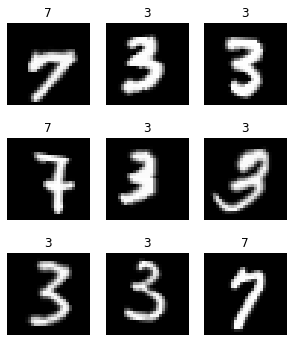

In [80]:
dls.show_batch(max_n=9, figsize=(5, 6))

## FROM_CSV & From_df

In [81]:
df = pd.read_csv(path/'labels.csv')
df.sample(3)

,name,label
2751,train/3/670.png,0
6391,train/7/16823.png,1
5776,train/3/22625.png,0


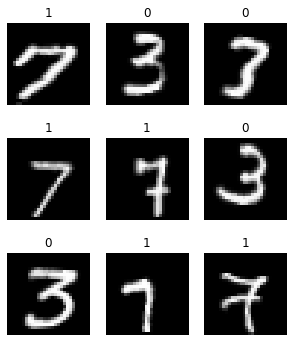

In [82]:
dls = ImageDataLoaders.from_csv(path, csv_fname='labels.csv', batch_tfms=tfms, size=28, bs=bs)
dls.show_batch(max_n=9, figsize=(5,6))

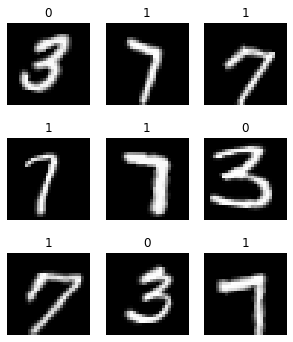

In [84]:
dls = ImageDataLoaders.from_df(df, path=path, batch_tfms=tfms,size=24)
dls.show_batch(figsize=(5,6))

# From_path_re & From_path_func

In [92]:
fn_paths = [path/name for name in df['name']]; fn_path[:2]

[Path('/root/.fastai/data/mnist_sample/train/3/7463.png'),
 Path('/root/.fastai/data/mnist_sample/train/3/21102.png')]

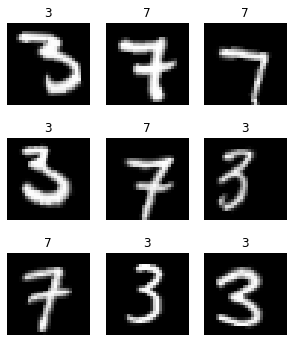

In [98]:
dls = ImageDataLoaders.from_path_re(path, fnames=fn_paths, pat = r"/(\d)/\d+\.png$", batch_tfms=tfms, size=24 )
dls.show_batch(max_n=9, figsize=(5, 6))

In [0]:
dls = ImageDataLoaders.from_path_func(path, fn_paths, 
                                      label_func = lambda x: '3' if "/3/" in str(x) else '7', 
                                      batch_tfms=tfms,
                                      size=24)

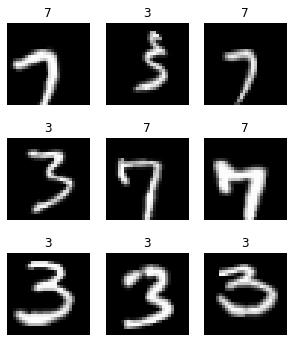

In [100]:
dls.show_batch(figsize=(5,6))

# From_list

In [103]:
labels = [('3' if '/3/' in str(x) else '7') for x in fn_paths]
labels[:7]

['3', '3', '3', '3', '3', '3', '3']

In [105]:
dls = ImageDataLoaders.from_lists(path, fn_paths, 
                                  labels=labels, 
                                  batch_tfms=tfms,
                                  size=24
                                  )

dls.show_batch(figsize=(5,6))

TypeError: ignored